In [1]:
import os
import sys
import heapq
import numpy as np
import networkx as nx
import spacy
from typing import List, Tuple, Dict, Union
from concurrent.futures import ThreadPoolExecutor, as_completed
from tqdm import tqdm
from nltk.stem import WordNetLemmatizer
from pydantic import BaseModel, Field
from sentence_transformers import SentenceTransformer
from pyvi.ViTokenizer import tokenize
from langchain.vectorstores import FAISS
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.prompts import PromptTemplate
from langchain.retrievers import ContextualCompressionRetriever
from langchain.retrievers.document_compressors import LLMChainExtractor
from langchain.callbacks import get_openai_callback
from langchain_openai import ChatOpenAI
from sklearn.metrics.pairwise import cosine_similarity
from langchain.document_loaders import PyPDFLoader

os.environ['OPENAI_API_KEY'] = "Your OpenAi key"

from class1VietnameseEmbeddings import *
from class2DocumentProcessor import *
from class3KnowledgeGraph import *
from class4QueryEngine import *
from class5Visualizer import *
from class6GraphRAG import *

d:\linh tinh\code\Project\.venv\Lib\site-packages\sentence_transformers\cross_encoder\CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


In [2]:
from langchain.document_loaders import PyPDFLoader
path = "D:\\linh tinh\\code\\Project\\final_pdf.pdf"
loader = PyPDFLoader(path)
documents = loader.load()
chunk_size = 400 
chunk_overlap = 100 
edges_threshold = 0.85 
if __name__ == '__main__':
    graph_rag = GraphRAG(documents,chunk_size=chunk_size, chunk_overlap=chunk_overlap, edges_threshold=edges_threshold)

`embedding_function` is expected to be an Embeddings object, support for passing in a function will soon be removed.
Adding edges: 100%|██████████| 14201/14201 [02:01<00:00, 116.62it/s] 



Processing query: Giáo dục phổ thông miền núi được phát triển như thế nào trong giai đoạn 1958-1960, và những kết quả đáng chú ý nào đã đạt được trong việc đào tạo giáo viên và học sinh các dân tộc ít người?

Retrieving relevant documents...

Traversing the knowledge graph:

Step 1 - Node 11689:
Content: bước vào các trư ờng khoa h ọc, kỹ thuật. Đồng th ời phát tri ển các trư ờng ph ổ thông.  
Giáo d ục...
Concepts: miền núi, trường khoa học, giáo dục phổ thông, chức bàn v ề những, phương pháp giáo dục, đào tạo giáo viên, kỹ thuật, Trung, phát triển, dân tộc ít người, bước vào các, Trư ờng Sư, trường phổ thông, hội nghị giáo dục miền núi
--------------------------------------------------

Step 2 - Node 11690 (neighbor of 11689):
Content: đến 4-6-1958, H ội ngh ị Giáo d ục miền núi l ần thứ nhất được tổ chức bàn v ề những phương 
hướng g...
Concepts: hướng, Nhà, nghiệp, Hội nghị Giáo dục miền núi, Chỉ thị 128, trường thiếu nhi vùng cao, chức bàn v ề những, Nhà nước, Trung, xuôi, giáo v

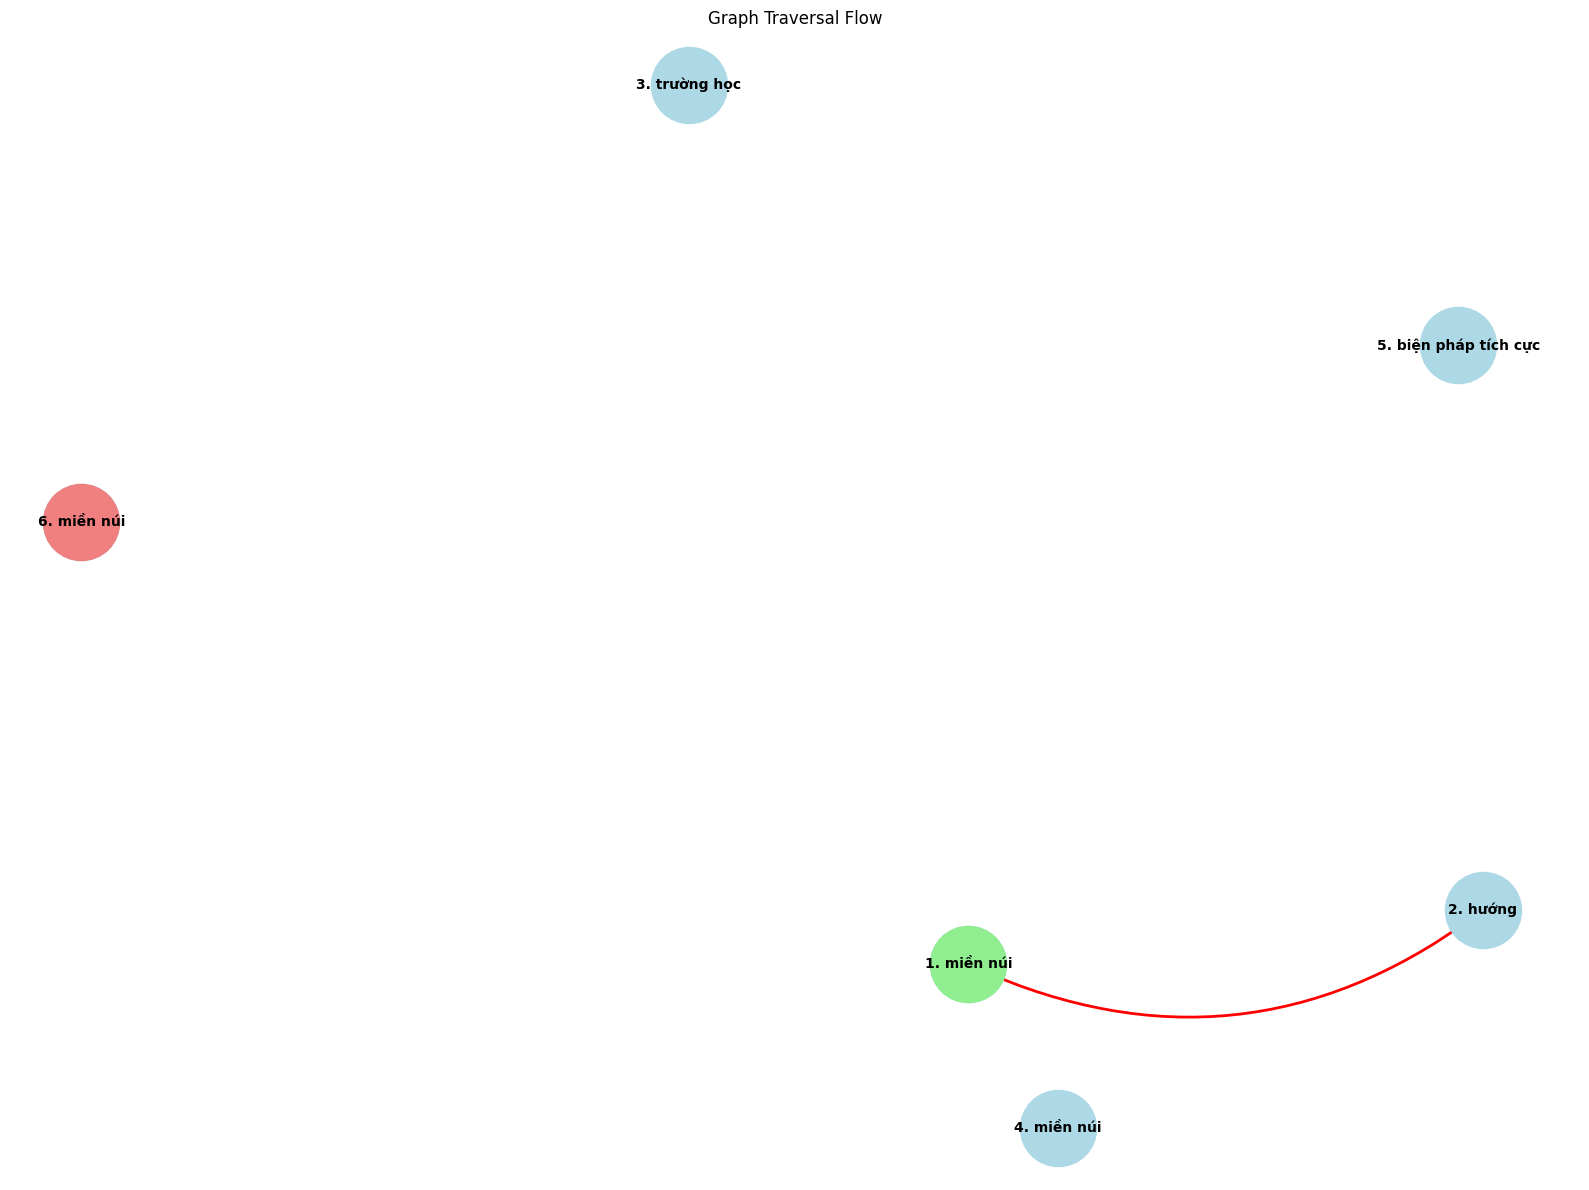

In [16]:

# sample query
query = 'Giáo dục phổ thông miền núi được phát triển như thế nào trong giai đoạn 1958-1960, và những kết quả đáng chú ý nào đã đạt được trong việc đào tạo giáo viên và học sinh các dân tộc ít người?'
response = graph_rag.query(query)

In [30]:
import tkinter as tk
from tkinter import scrolledtext
import re

def execute_query():
    query = query_entry.get().strip()
    try:
        raw_response = graph_rag.query(query)  
        match = re.search(r"content='(.*?)'", raw_response, re.DOTALL)
        response = match.group(1) if match else "No content found in the response."
    except Exception as e:
        response = f"Error: {e}"

    response_textbox.delete(1.0, tk.END)
    response_textbox.insert(tk.END, response)
root = tk.Tk()
root.title("Graph-RAG Query UI")
root.state('zoomed')  
frame = tk.Frame(root, padx=10, pady=10)
frame.pack(fill=tk.BOTH, expand=True, padx=10, pady=10)

query_label = tk.Label(frame, text="Enter your query:", font=("Arial", 12))
query_label.grid(row=0, column=0, sticky="w", pady=10)

query_entry = tk.Entry(frame, font=("Arial", 14), width=80)  
query_entry.grid(row=0, column=1, padx=5, pady=10)

execute_button = tk.Button(frame, text="Submit", font=("Arial", 12), command=execute_query)
execute_button.grid(row=0, column=2, padx=5, pady=10)

response_label = tk.Label(frame, text="Response:", font=("Arial", 12))
response_label.grid(row=1, column=0, sticky="nw", pady=10)
response_textbox = scrolledtext.ScrolledText(frame, wrap=tk.WORD, font=("Arial", 12), width=100, height=30)  
response_textbox.grid(row=1, column=1, columnspan=2, padx=5, pady=10)
root.mainloop()

